# Introduction to dynamic programming

In [ ]:
# class 2024 CM1014

Dynamic programming is a method for solving complex problems by breaking them down into simpler subproblems. It is applicable when the problem can be divided into overlapping subproblems which can be solved independently. The key idea is to store the results of these subproblems to avoid redundant computations, thus improving efficiency.

Dynamic programming typically involves two main approaches:
1. **Top-down approach (Memoization)**: This involves solving the problem recursively and storing the results of subproblems in a table (usually a dictionary or array) to avoid recomputation.
2. **Bottom-up approach (Tabulation)**: This involves solving all possible subproblems starting from the simplest ones and combining their solutions to solve larger subproblems, usually using an iterative approach.

Dynamic programming is commonly used in optimization problems where the goal is to find the best solution among many possible solutions. Examples include the Fibonacci sequence, shortest path problems, and knapsack problems.

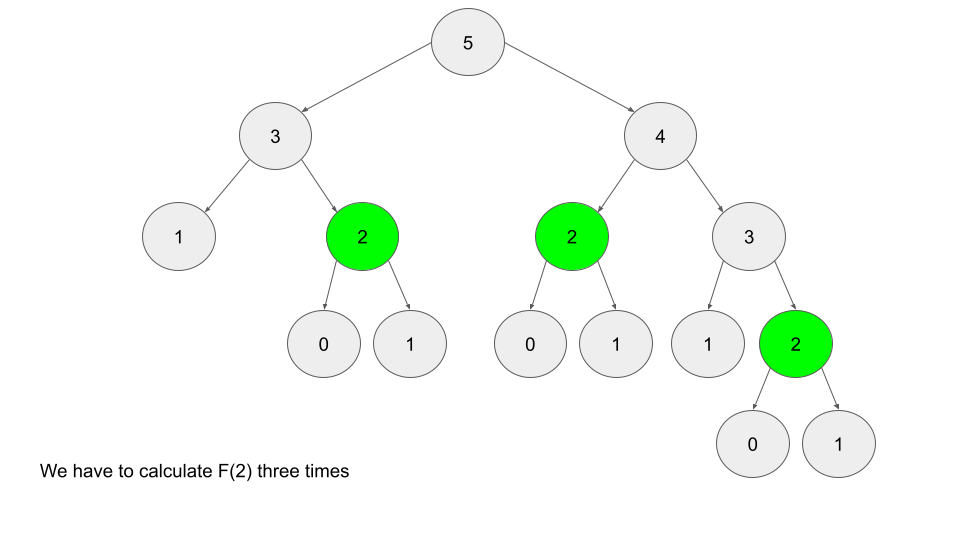

### Top down approach using memoization

In [ ]:
# Define a dictionary to store the results of subproblems
memo = {}

def fibonacci(n):
    # Base cases
    if n == 0:
        return 0
    if n == 1:
        return 1
    
    # Check if the result is already in the memo dictionary
    if n in memo:
        return memo[n]
    
    # Compute the result and store it in the memo dictionary
    memo[n] = fibonacci(n-1) + fibonacci(n-2)
    return memo[n]

# Test the function
print(fibonacci(10))  # Output: 55

### Bottom-up approach using tabulation

In [ ]:
def fibonacci_tabulation(n):
    # Base cases
    if n == 0:
        return 0
    if n == 1:
        return 1
    
    # Create a table to store the results of subproblems
    table = [0] * (n + 1)
    table[1] = 1
    
    # Fill the table using the bottom-up approach
    for i in range(2, n + 1):
        table[i] = table[i - 1] + table[i - 2]
    
    return table[n]

# Test the function
print(fibonacci_tabulation(10))  # Output: 55

# When do we use dynamic programming?

When it comes to solving an algorithm problem, especially in a high-pressure scenario such as an interview, half the battle is figuring out how to even approach the problem. In the first section, we defined what makes a problem a good candidate for dynamic programming. Recall:

- The problem can be broken down into "overlapping subproblems" - smaller versions of the original problem that are re-used multiple times.
- The problem has an "optimal substructure" - an optimal solution can be formed from optimal solutions to the overlapping subproblems of the original problem.

Unfortunately, it is hard to identify when a problem fits into these definitions. Instead, let's discuss some common characteristics of DP problems that are easy to identify.

The first characteristic that is common in DP problems is that the problem will ask for the optimum value (maximum or minimum) of something, or the number of ways there are to do something. For example:

- What is the minimum cost of doing...
- What is the maximum profit from...
- How many ways are there to do...
- What is the longest possible...
- Is it possible to reach a certain point...

>Note: Not all DP problems follow this format, and not all problems that follow these formats should be solved using DP. However, these formats are very common for DP problems and are generally a hint that you should consider using dynamic programming. When it comes to identifying if a problem should be solved with DP, this first characteristic is not sufficient. 
> 
> Sometimes, a problem in this format (asking for the max/min/longest etc.) is meant to be solved with a greedy algorithm. The next characteristic will help us determine whether a problem should be solved using a greedy algorithm or dynamic programming.

The second characteristic that is common in DP problems is that future "decisions" depend on earlier decisions. Deciding to do something at one step may affect the ability to do something in a later step. This characteristic is what makes a greedy algorithm invalid for a DP problem - we need to factor in results from previous decisions. Admittedly, this characteristic is not as well defined as the first one, and the best way to identify it is to go through some examples such as the [House Robber problem](https://leetcode.com/problems/house-robber/description/)

In [ ]:
# So lets try a problem (The house robber problem from wiki) will get us started 

In [ ]:
# link to house robber problem https://leetcode.com/problems/house-robber/description/

> You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night. 
> 
> Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

#### Decision-Making in Dynamic Programming Problems  

In this problem, each decision will affect what options are available to the robber in the future. For example, with the test case:  

`nums = [2, 7, 9, 3, 1]`  

The optimal solution is to rob the houses with **2, 9, and 1** money. However, if we were to iterate from left to right in a greedy manner, our first decision would be whether to rob the first or second house.  

Since **7 is way more money than 2**, a greedy approach would suggest robbing house 7. However, this prevents us from robbing the house with **9** money, which is a more optimal choice in the long run. This illustrates that our **early decisions affect future options**, making greedy approaches suboptimal for this problem.  

---

#### Longest Increasing Subsequence  

The [Longest Increasing Subsequence (LIS)](https://leetcode.com/problems/longest-increasing-subsequence/) is another example of a classic **dynamic programming** problem. In this problem, we need to determine the length of the longest subsequence that is **strictly increasing**.  

For example, given the input:  

`nums = [1, 2, 6, 3, 5]`  

The longest increasing subsequence is:  

`[1, 2, 3, 5]`  

which has a length of **4**.  

---

### Key Decision Points  

Again, an important decision comes when we arrive at the **6** in the sequence.  

- **Do we take it or not?**  
- If we **take** the 6, we increase our current sequence length by 1.  
- However, taking the 6 means we **can no longer take** the 3 or 5, which could lead to a longer increasing subsequence.  

For small examples, it’s easy to see why skipping 6 is better. But how do we **design an algorithm** that always makes the right choices with **huge inputs** (e.g., `nums` containing **10,000 numbers**)?  

The answer lies in **dynamic programming**—a technique that allows us to efficiently explore all possibilities while avoiding redundant calculations.

In [ ]:
# link for Longest Increasing Subsequence (LIS) -> https://leetcode.com/problems/longest-increasing-subsequence/description/

#### Identifying Dynamic Programming Problems  

When solving a problem on your own, **assume the second characteristic (decision dependency) isn't applicable** first. Then, try to think of a **counterexample** that proves a greedy algorithm won't work.  

- If you can find an example where **earlier decisions affect future decisions**, then **dynamic programming (DP) is applicable**.  

#### Recognizing DP Problems  

If a problem is asking for:  

- **Maximum / Minimum / Longest / Shortest** of something  
- **The number of ways** to do something  
- **Whether it is possible** to reach a certain point  

It is **probably a greedy or DP problem**.  

#### When to Use DP?  

With time and practice, it becomes easier to **identify** whether DP is the best approach.  

However, in general, if the problem has **constraints** that cause **decisions to affect other decisions**, such as **using one element prevents the usage of others**, then **dynamic programming should be considered**.  

These two characteristics help determine if **DP is the right choice**, but remember:  

> **These are guidelines, not strict rules**—DP is a broad topic, and exceptions exist.